<a href="https://colab.research.google.com/github/ranjithsrajan/PyLab/blob/main/M4_MP1_NB_Traffic_sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project: Image classification using MLP and CNN



## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement CNN using keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

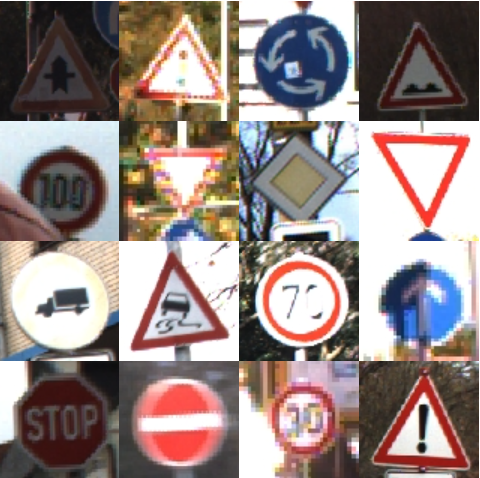

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [1]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


###**Excercise 1**

### Data Loading and Feature Extraction (1 points)

#### Get the features and labels of data

* Extract the features of the images
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [ ]:
# Loading the Image data
# Read the entire file
import pandas as pd

df = pd.read_csv(r"C:\Users\denny\OneDrive\Machine learning\ADSML\Deeplearning  Foundations\Assignments\Miniproject\FullIJCNN2013\FullIJCNN2013\gt.txt",
                 sep=';',
                 header=None,
                 names=['ImgNo.ppm', 'leftCol', 'topRow', 'rightCol', 'bottomRow', 'ClassID'])

print(df.head())

   ImgNo.ppm  leftCol  topRow  rightCol  bottomRow  ClassID
0  00000.ppm      774     411       815        446       11
1  00001.ppm      983     388      1024        432       40
2  00001.ppm      386     494       442        552       38
3  00001.ppm      973     335      1031        390       13
4  00002.ppm      892     476      1006        592       39


In [ ]:
len(df['ClassID'].unique())

43

In [ ]:
# loading the image file


# Load your gt.txt file
df = pd.read_csv(r"C:\Users\denny\OneDrive\Machine learning\ADSML\Deeplearning  Foundations\Assignments\Miniproject\FullIJCNN2013\FullIJCNN2013\gt.txt",
                 sep=';',
                 header=None,
                 names=['ImgNo', 'leftCol', 'topRow', 'rightCol', 'bottomRow', 'ClassID'])

folder_path = r"C:\Users\denny\OneDrive\Machine learning\ADSML\Deeplearning  Foundations\Assignments\Miniproject\FullIJCNN2013\FullIJCNN2013"

# Load images based on DataFrame
images = []
for img_name in df['ImgNo']:
    img_path = os.path.join(folder_path, img_name)
    img = imread(img_path)
    images.append(img)

# Add images to DataFrame
df['image'] = images

print(df.head())

       ImgNo  leftCol  topRow  rightCol  bottomRow  ClassID  \
0  00000.ppm      774     411       815        446       11   
1  00001.ppm      983     388      1024        432       40   
2  00001.ppm      386     494       442        552       38   
3  00001.ppm      973     335      1031        390       13   
4  00002.ppm      892     476      1006        592       39   

                                               image  
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
1  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
2  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
4  [[[255, 255, 255], [255, 255, 255], [255, 255,...  


###**Excercise 2**
### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

Total classes: 43


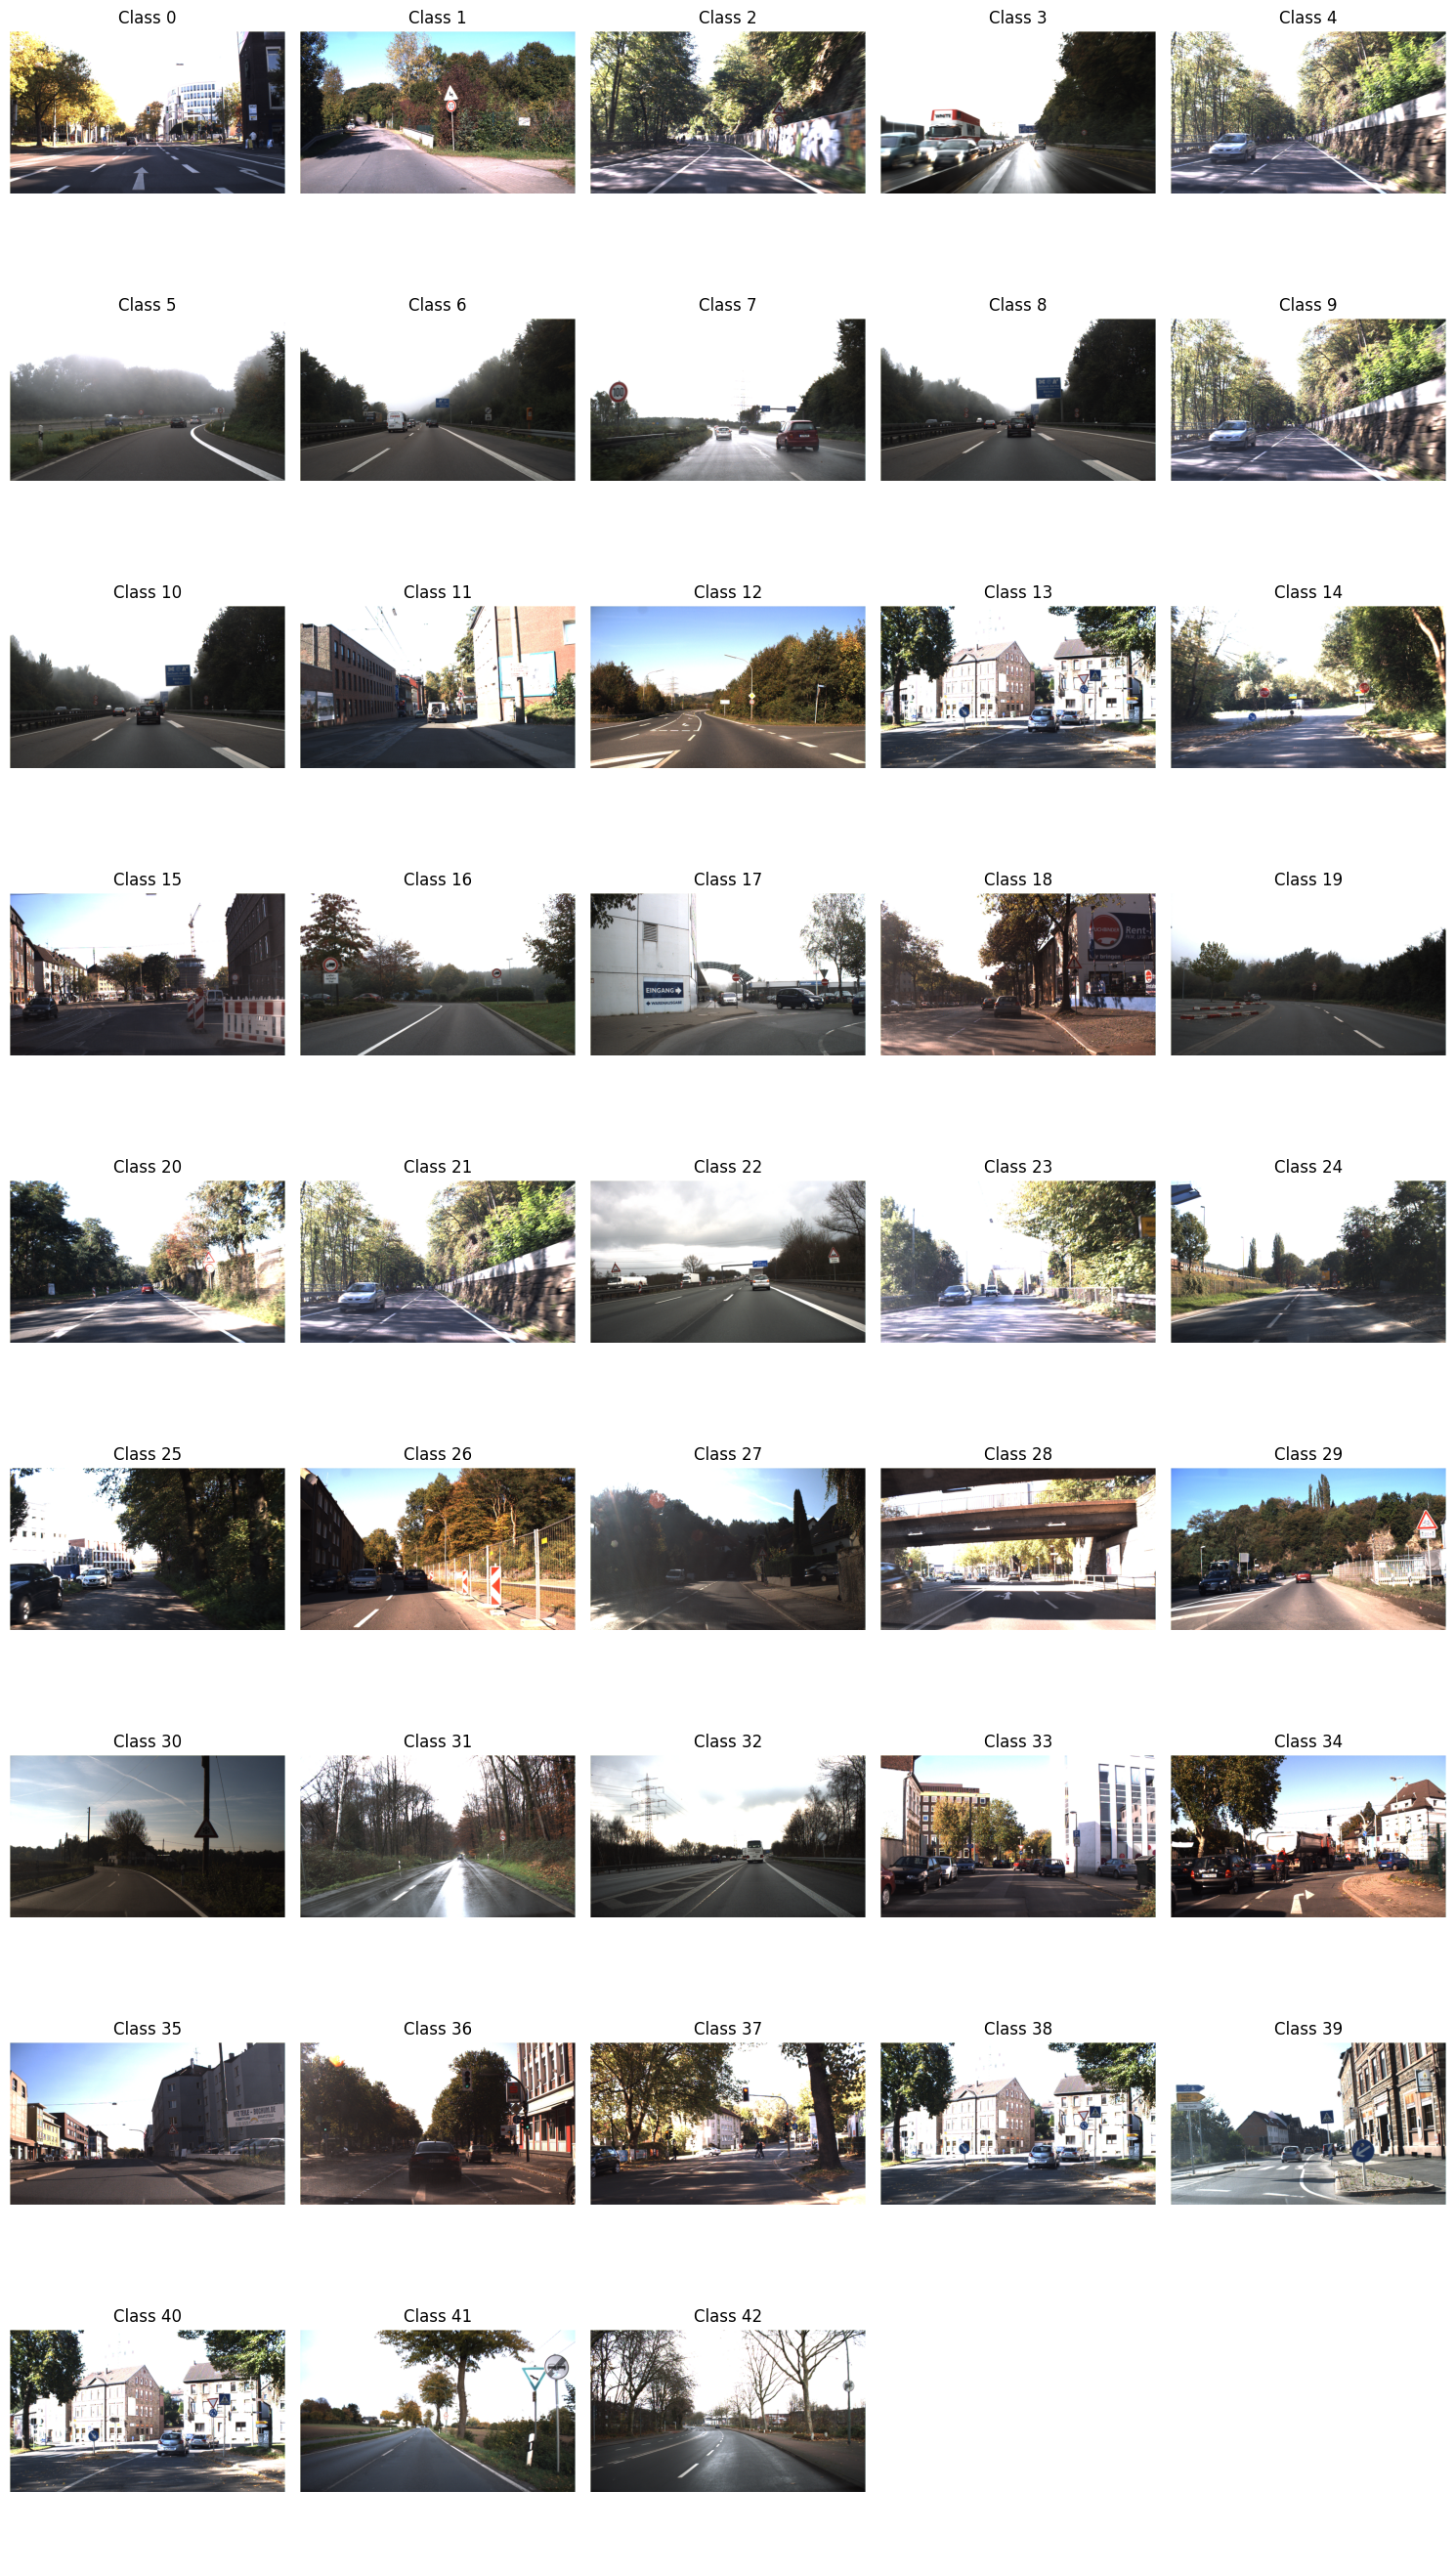

In [ ]:
# YOUR CODE HERE

unique_classes = df['ClassID'].unique()
print(f"Total classes: {len(unique_classes)}")

# Get one sample image per class
sample_images = df.groupby('ClassID').first().reset_index()

# Calculate grid size
n_classes = len(unique_classes)
cols = 5  # Number of columns in the grid
rows = (n_classes + cols - 1) // cols  # Calculate rows needed

# Create the plot
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*3))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each class sample
for idx, (_, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(folder_path, row['ImgNo'])
    img = imread(img_path)

    axes[idx].imshow(img)
    axes[idx].set_title(f"Class {row['ClassID']}")
    axes[idx].axis('off')

# Hide unused subplots
for idx in range(len(sample_images), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### Plot the distribution of Classes

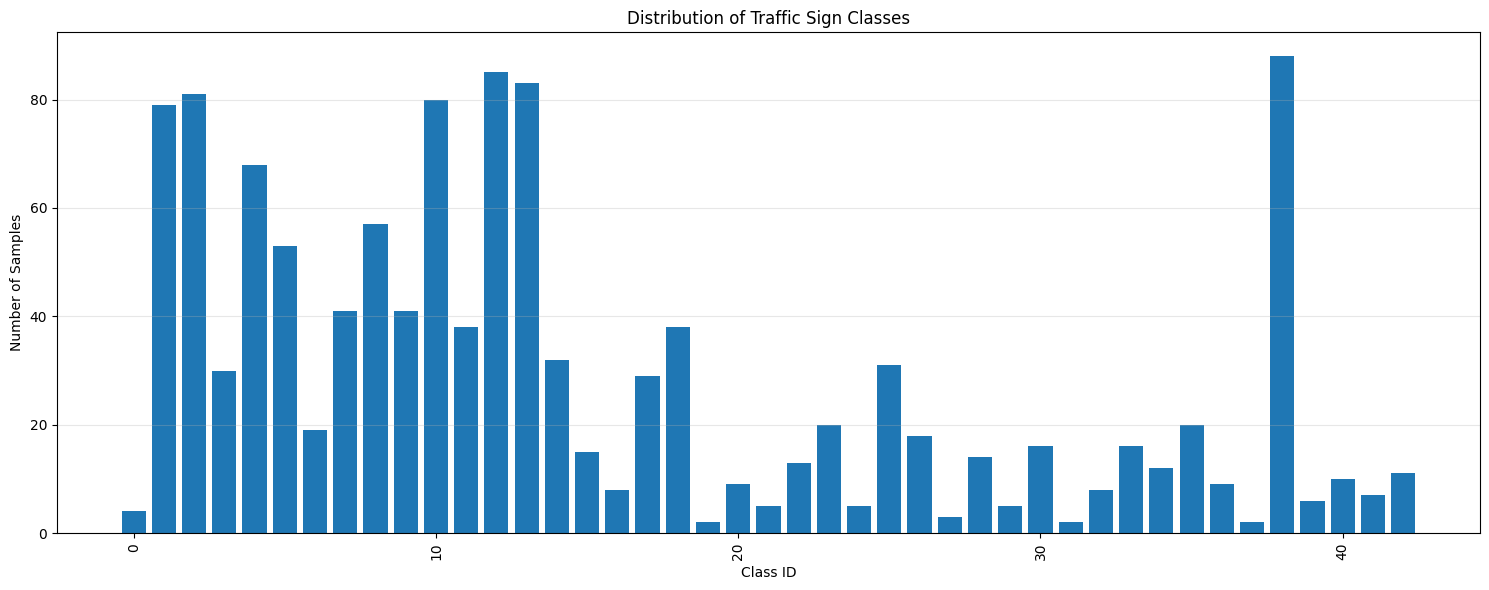

Total classes: 43
Total samples: 1213


In [ ]:
# YOUR CODE HERE

class_counts = df['ClassID'].value_counts().sort_index()

# Plot
plt.figure(figsize=(15, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class ID')
plt.ylabel('Number of Samples')
plt.title('Distribution of Traffic Sign Classes')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total classes: {len(class_counts)}")
print(f"Total samples: {len(df)}")

In [ ]:

# Extract signs and add to DataFrame
signs = []
for _, row in df.iterrows():
    img_path = os.path.join(folder_path, row['ImgNo'])
    sign = extract_sign(img_path, row['leftCol'], row['topRow'],
                       row['rightCol'], row['bottomRow'])
    signs.append(sign)

# Add as new column
df['sign_image'] = signs

print(df.head())
print(f"\nDataFrame shape: {df.shape}")
print(f"Sign image shape: {df['sign_image'][0].shape}")

       ImgNo  leftCol  topRow  rightCol  bottomRow  ClassID  \
0  00000.ppm      774     411       815        446       11   
1  00001.ppm      983     388      1024        432       40   
2  00001.ppm      386     494       442        552       38   
3  00001.ppm      973     335      1031        390       13   
4  00002.ppm      892     476      1006        592       39   

                                               image  \
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
1  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
2  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
4  [[[255, 255, 255], [255, 255, 255], [255, 255,...   

                                          sign_image  
0  [[[0.3754586014102677, 0.43027630974252307, 0....  
1  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...  
2  [[[0.9996887951589142, 0.9995331964280438, 0.9...  
3  [[[0.9457130442607431, 0.8988406341462057, 0.8...  
4  [[[0.9

In [ ]:
# Extract sign images and labels
X = np.array(df['sign_image'].tolist())  # Shape: (n_samples, 32, 32, 3)
y = df['ClassID'].values  # Shape: (n_samples,)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Image value range: [{X.min()}, {X.max()}]")

X shape: (1213, 32, 32, 3)
y shape: (1213,)
Number of classes: 43
Image value range: [0.0, 1.0]


#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [ ]:
# YOUR CODE HERE
# function for cropping and resizing signs
from skimage.transform import resize
# Function to crop and resize signs
def extract_sign(img_path, left, top, right, bottom, target_size=(32, 32)):
    img = imread(img_path)
    # Crop the sign
    sign = img[top:bottom, left:right]
    # Resize to standard size
    sign_resized = resize(sign, target_size, anti_aliasing=True)
    return sign_resized


Index(['ImgNo', 'leftCol', 'topRow', 'rightCol', 'bottomRow', 'ClassID',
       'image', 'sign_image'],
      dtype='object')

In [ ]:

# Extract signs ,normalising  and add to DataFrame
signs = []
for _, row in df.iterrows():
    img_path = os.path.join(folder_path, row['ImgNo'])
    sign = extract_sign(img_path, row['leftCol'], row['topRow'],
                       row['rightCol'], row['bottomRow'])
    signs.append(sign)

# Add as new column
df['sign_image'] = signs

print(df.head())
print(f"\nDataFrame shape: {df.shape}")
print(f"Sign image shape: {df['sign_image'][0].shape}")

       ImgNo  leftCol  topRow  rightCol  bottomRow  ClassID  \
0  00000.ppm      774     411       815        446       11   
1  00001.ppm      983     388      1024        432       40   
2  00001.ppm      386     494       442        552       38   
3  00001.ppm      973     335      1031        390       13   
4  00002.ppm      892     476      1006        592       39   

                                               image  \
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
1  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
2  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
4  [[[255, 255, 255], [255, 255, 255], [255, 255,...   

                                          sign_image  
0  [[[0.3754586014102677, 0.43027630974252307, 0....  
1  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...  
2  [[[0.9996887951589142, 0.9995331964280438, 0.9...  
3  [[[0.9457130442607431, 0.8988406341462057, 0.8...  
4  [[[0.9

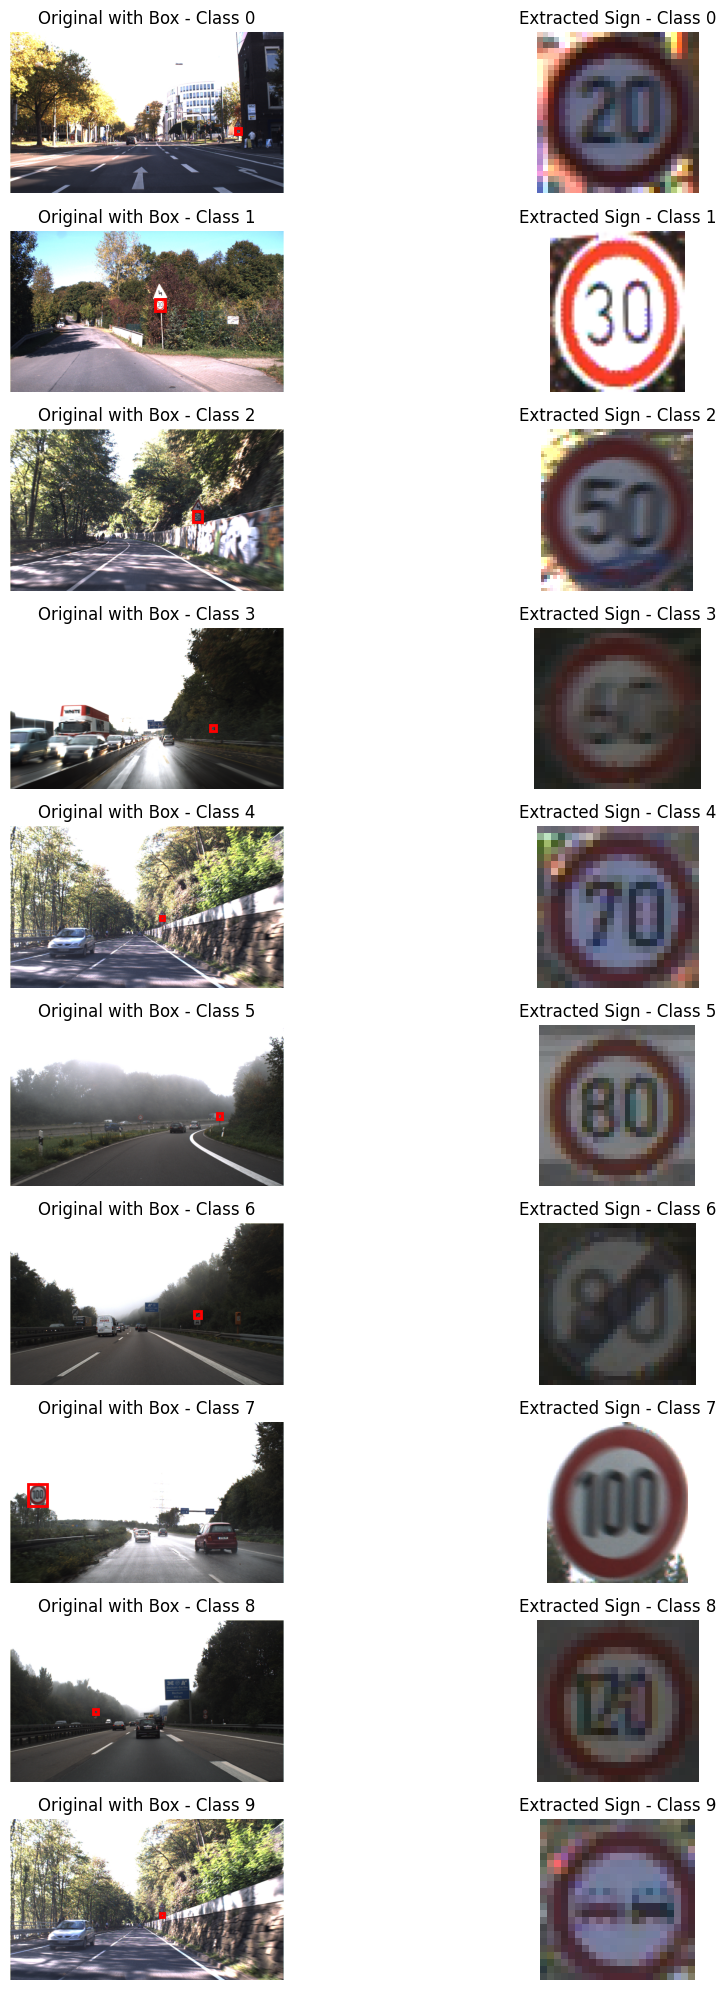

In [ ]:
# ploting the sign image
import matplotlib.patches as patches

n_samples = 10

fig, axes = plt.subplots(n_samples, 2, figsize=(12, n_samples*2))

for idx in range(n_samples):
    row = sample_images.iloc[idx]
    img_path = os.path.join(folder_path, row['ImgNo'])

    # Read original image
    original_img = imread(img_path)

    # Extract cropped sign
    cropped_sign = original_img[row['topRow']:row['bottomRow'],
                                row['leftCol']:row['rightCol']]

    # Display original with bounding box
    axes[idx, 0].imshow(original_img)
    rect = patches.Rectangle((row['leftCol'], row['topRow']),
                             row['rightCol'] - row['leftCol'],
                             row['bottomRow'] - row['topRow'],
                             linewidth=2, edgecolor='red', facecolor='none')
    axes[idx, 0].add_patch(rect)
    axes[idx, 0].set_title(f"Original with Box - Class {row['ClassID']}")
    axes[idx, 0].axis('off')

    # Display cropped sign
    axes[idx, 1].imshow(cropped_sign)
    axes[idx, 1].set_title(f"Extracted Sign - Class {row['ClassID']}")
    axes[idx, 1].axis('off')

plt.tight_layout()
plt.show()

###**Excercise 3**
### Train the MLP classifier on features (3 points)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics



* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
# Step 1 - Build the architecture using the Pytorch framework
# YOUR CODE HERE
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(MLPClassifier, self).__init__()

        layers = []

        # Input layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(0.3))

        # Hidden layers
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.3))

        # Output layer
        layers.append(nn.Linear(hidden_sizes[-1], num_classes))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Create MLP model
input_size = 32 * 32 * 3  # Flattened image size
hidden_sizes = [256, 128, 64]
num_classes = len(np.unique(y))

mlp_model = MLPClassifier(input_size, hidden_sizes, num_classes).to(device)

print("MLP Model Architecture:")
print(mlp_model)
print(f"\nTotal parameters: {sum(p.numel() for p in mlp_model.parameters())}")

MLP Model Architecture:
MLPClassifier(
  (network): Sequential(
    (0): Linear(in_features=3072, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=64, out_features=43, bias=True)
  )
)

Total parameters: 830635


In [ ]:
# Prepration of Data


# Extract sign images and labels
X = np.array(df['sign_image'].tolist())  # Shape: (n_samples, 32, 32, 3)
y = df['ClassID'].values  # Shape: (n_samples,)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Image value range: [{X.min()}, {X.max()}]")

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 970
Test set size: 243


In [ ]:
#Convert to PyTorch Tensors
# For MLP: Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Shape: (n_samples, 32*32*3)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# For CNN: Transpose to PyTorch format (N, C, H, W)
# Currently: (N, H, W, C) → Need: (N, C, H, W)
X_train_cnn = np.transpose(X_train, (0, 3, 1, 2))  # Shape: (n_samples, 3, 32, 32)
X_test_cnn = np.transpose(X_test, (0, 3, 1, 2))

# Convert to PyTorch tensors
X_train_flat_tensor = torch.FloatTensor(X_train_flat)
X_test_flat_tensor = torch.FloatTensor(X_test_flat)

X_train_cnn_tensor = torch.FloatTensor(X_train_cnn)
X_test_cnn_tensor = torch.FloatTensor(X_test_cnn)

y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

print(f"MLP input shape: {X_train_flat_tensor.shape}")
print(f"CNN input shape: {X_train_cnn_tensor.shape}")

MLP input shape: torch.Size([970, 3072])
CNN input shape: torch.Size([970, 3, 32, 32])


In [ ]:
#Create DataLoaders
# Create datasets
train_dataset_mlp = TensorDataset(X_train_flat_tensor, y_train_tensor)
test_dataset_mlp = TensorDataset(X_test_flat_tensor, y_test_tensor)

train_dataset_cnn = TensorDataset(X_train_cnn_tensor, y_train_tensor)
test_dataset_cnn = TensorDataset(X_test_cnn_tensor, y_test_tensor)

# Create dataloaders
batch_size = 32

train_loader_mlp = DataLoader(train_dataset_mlp, batch_size=batch_size, shuffle=True)
test_loader_mlp = DataLoader(test_dataset_mlp, batch_size=batch_size, shuffle=False)

train_loader_cnn = DataLoader(train_dataset_cnn, batch_size=batch_size, shuffle=True)
test_loader_cnn = DataLoader(test_dataset_cnn, batch_size=batch_size, shuffle=False)

print(f"Number of training batches (MLP): {len(train_loader_mlp)}")
print(f"Number of test batches (MLP): {len(test_loader_mlp)}")

Number of training batches (MLP): 31
Number of test batches (MLP): 8


In [ ]:
# Defining a training Functions
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    return epoch_loss, epoch_acc

In [ ]:
# Defining the evaluation Function
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(test_loader)
    epoch_acc = 100 * correct / total

    return epoch_loss, epoch_acc, all_preds, all_labels

In [ ]:
#Fit and Evaluate the model
# YOUR CODE HERE
# Training MLP Model
num_epochs = 50
learning_rate = 0.001

# Loss and optimizer for MLP
criterion_mlp = nn.CrossEntropyLoss()
optimizer_mlp = optim.Adam(mlp_model.parameters(), lr=learning_rate)

# Track history
mlp_train_losses = []
mlp_train_accs = []
mlp_test_losses = []
mlp_test_accs = []

print("Training MLP Model...")
print("-" * 50)

for epoch in range(num_epochs):
    # Train
    train_loss, train_acc = train_model(mlp_model, train_loader_mlp,
                                       criterion_mlp, optimizer_mlp, device)

    # Evaluate
    test_loss, test_acc, _, _ = evaluate_model(mlp_model, test_loader_mlp,
                                               criterion_mlp, device)

    # Store history
    mlp_train_losses.append(train_loss)
    mlp_train_accs.append(train_acc)
    mlp_test_losses.append(test_loss)
    mlp_test_accs.append(test_acc)

    # Print progress
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'  Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

print("\nMLP Training Complete!")
print(f"Final Test Accuracy: {mlp_test_accs[-1]:.2f}%")

Training MLP Model...
--------------------------------------------------
Epoch [5/50]
  Train Loss: 2.9167, Train Acc: 21.75%
  Test Loss: 2.6886, Test Acc: 26.75%
Epoch [10/50]
  Train Loss: 2.1578, Train Acc: 36.29%
  Test Loss: 1.8916, Test Acc: 44.44%
Epoch [15/50]
  Train Loss: 1.8386, Train Acc: 42.47%
  Test Loss: 1.6034, Test Acc: 47.33%
Epoch [20/50]
  Train Loss: 1.6239, Train Acc: 47.32%
  Test Loss: 1.3485, Test Acc: 58.44%
Epoch [25/50]
  Train Loss: 1.4335, Train Acc: 52.16%
  Test Loss: 1.1507, Test Acc: 59.26%
Epoch [30/50]
  Train Loss: 1.3242, Train Acc: 54.02%
  Test Loss: 1.2060, Test Acc: 63.37%
Epoch [35/50]
  Train Loss: 1.2323, Train Acc: 58.76%
  Test Loss: 0.9273, Test Acc: 71.19%
Epoch [40/50]
  Train Loss: 1.1355, Train Acc: 61.13%
  Test Loss: 0.8939, Test Acc: 76.54%
Epoch [45/50]
  Train Loss: 1.0085, Train Acc: 66.60%
  Test Loss: 0.7915, Test Acc: 72.02%
Epoch [50/50]
  Train Loss: 1.0616, Train Acc: 62.37%
  Test Loss: 0.7708, Test Acc: 80.25%

MLP Tra

In [ ]:

# YOUR CODE HERE

# Get final predictions
_, _, mlp_preds, mlp_labels = evaluate_model(mlp_model, test_loader_mlp,
                                              criterion_mlp, device)


# Classification reports
print("\nMLP Classification Report:")
print(classification_report(mlp_labels, mlp_preds))



MLP Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.93      0.81      0.87        16
           2       0.78      0.88      0.82        16
           3       0.00      0.00      0.00         6
           4       0.86      0.86      0.86        14
           5       0.50      0.91      0.65        11
           6       1.00      1.00      1.00         4
           7       0.83      0.62      0.71         8
           8       0.82      0.82      0.82        11
           9       0.73      1.00      0.84         8
          10       0.94      1.00      0.97        16
          11       0.67      1.00      0.80         8
          12       0.94      0.94      0.94        17
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         3
          16       0.00      0.00      0.00         2

c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

#### Try the different algorithms and compare the results with MLP classifier

###**Excercise 4**
### Train a CNN classifier on images (4 points)

* Split the data into train and test

* Train the CNN with 2D convolution and Maxpooling layers

* Get the accuracy score on train and test sets



* Define the keras model and initialize the layers
  - Ensure the input layer is specified with correct image size as input. This can be specified when creating the first layer with the input_shape argument.
* Speicify number of filters Kernel size, Pool size and activation function
  - filters,kernel_size and activation arguments of Conv2D layer can be used
  - pool_size argument of MaxPool2D can be used to set Pool size
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
# Step 1 - Build the architecture
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()

        # Convolutional layers
        self.conv_layers = nn.Sequential(
            # Conv Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # Output: 32x32x32
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),  # Output: 16x16x32

            # Conv Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # Output: 16x16x64
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),  # Output: 8x8x64

            # Conv Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # Output: 8x8x128
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),  # Output: 4x4x128
        )

        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Create CNN model
cnn_model = CNNClassifier(num_classes).to(device)

print("CNN Model Architecture:")
print(cnn_model)
print(f"\nTotal parameters: {sum(p.numel() for p in cnn_model.parameters())}")

CNN Model Architecture:
CNNClassifier(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=256, bias=True)
 

In [ ]:
# Step 2 - Compile the model
# YOUR CODE HERE

In [ ]:
# Step 3 - Fit and Evaluate the model
# Loss and optimizer for CNN
criterion_cnn = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=learning_rate)

# Track history
cnn_train_losses = []
cnn_train_accs = []
cnn_test_losses = []
cnn_test_accs = []

print("\nTraining CNN Model...")
print("-" * 50)

for epoch in range(num_epochs):
    # Train
    train_loss, train_acc = train_model(cnn_model, train_loader_cnn,
                                       criterion_cnn, optimizer_cnn, device)

    # Evaluate
    test_loss, test_acc, _, _ = evaluate_model(cnn_model, test_loader_cnn,
                                               criterion_cnn, device)

    # Store history
    cnn_train_losses.append(train_loss)
    cnn_train_accs.append(train_acc)
    cnn_test_losses.append(test_loss)
    cnn_test_accs.append(test_acc)

    # Print progress
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'  Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

print("\nCNN Training Complete!")
print(f"Final Test Accuracy: {cnn_test_accs[-1]:.2f}%")


Training CNN Model...
--------------------------------------------------
Epoch [5/50]
  Train Loss: 1.6965, Train Acc: 48.66%
  Test Loss: 1.3176, Test Acc: 62.55%
Epoch [10/50]
  Train Loss: 0.4728, Train Acc: 85.15%
  Test Loss: 0.3402, Test Acc: 90.95%
Epoch [15/50]
  Train Loss: 0.2320, Train Acc: 93.30%
  Test Loss: 0.1880, Test Acc: 94.24%
Epoch [20/50]
  Train Loss: 0.1332, Train Acc: 95.77%
  Test Loss: 0.0937, Test Acc: 96.71%
Epoch [25/50]
  Train Loss: 0.0767, Train Acc: 98.14%
  Test Loss: 0.1107, Test Acc: 95.47%
Epoch [30/50]
  Train Loss: 0.0752, Train Acc: 97.22%
  Test Loss: 0.1669, Test Acc: 95.88%
Epoch [35/50]
  Train Loss: 0.0819, Train Acc: 97.73%
  Test Loss: 0.1568, Test Acc: 95.47%
Epoch [40/50]
  Train Loss: 0.0738, Train Acc: 97.53%
  Test Loss: 0.1107, Test Acc: 95.06%
Epoch [45/50]
  Train Loss: 0.0660, Train Acc: 98.56%
  Test Loss: 0.1379, Test Acc: 97.12%
Epoch [50/50]
  Train Loss: 0.0510, Train Acc: 97.94%
  Test Loss: 0.1340, Test Acc: 96.71%

CNN Tr

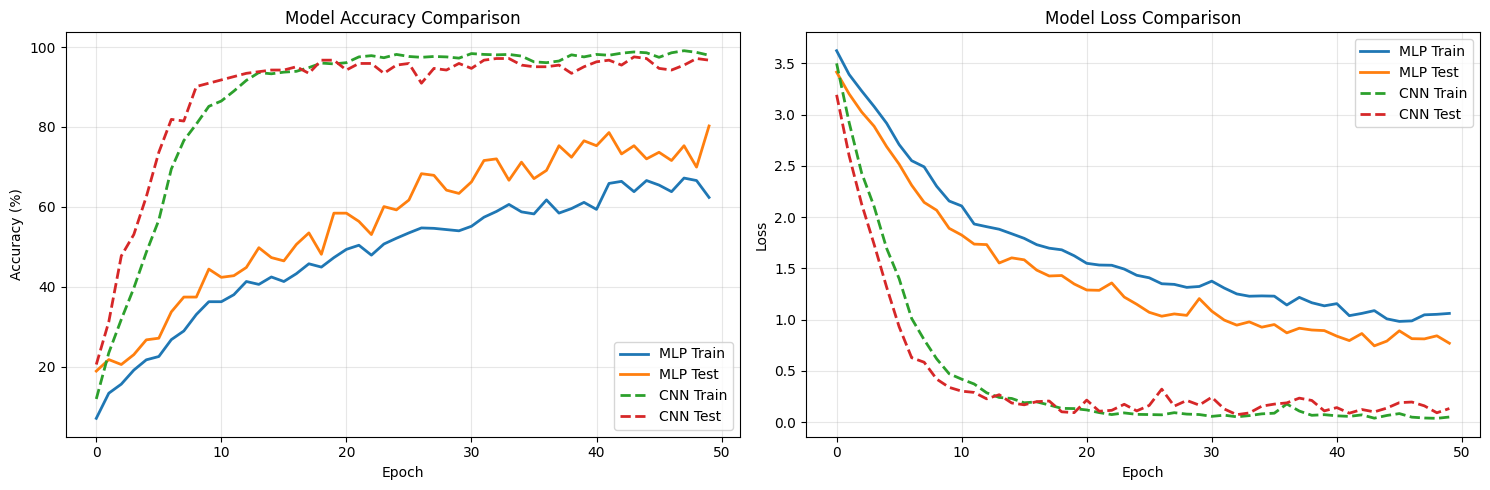


FINAL COMPARISON
MLP  - Final Test Accuracy: 80.25%
CNN  - Final Test Accuracy: 96.71%
Improvement: 16.46%


In [ ]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axes[0].plot(mlp_train_accs, label='MLP Train', linewidth=2)
axes[0].plot(mlp_test_accs, label='MLP Test', linewidth=2)
axes[0].plot(cnn_train_accs, label='CNN Train', linewidth=2, linestyle='--')
axes[0].plot(cnn_test_accs, label='CNN Test', linewidth=2, linestyle='--')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Model Accuracy Comparison')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(mlp_train_losses, label='MLP Train', linewidth=2)
axes[1].plot(mlp_test_losses, label='MLP Test', linewidth=2)
axes[1].plot(cnn_train_losses, label='CNN Train', linewidth=2, linestyle='--')
axes[1].plot(cnn_test_losses, label='CNN Test', linewidth=2, linestyle='--')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Model Loss Comparison')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print comparison
print("\n" + "="*50)
print("FINAL COMPARISON")
print("="*50)
print(f"MLP  - Final Test Accuracy: {mlp_test_accs[-1]:.2f}%")
print(f"CNN  - Final Test Accuracy: {cnn_test_accs[-1]:.2f}%")
print(f"Improvement: {cnn_test_accs[-1] - mlp_test_accs[-1]:.2f}%")

In [ ]:
# Get final predictions
_, _, mlp_preds, mlp_labels = evaluate_model(mlp_model, test_loader_mlp,
                                              criterion_mlp, device)
_, _, cnn_preds, cnn_labels = evaluate_model(cnn_model, test_loader_cnn,
                                              criterion_cnn, device)

# Classification reports
print("\nMLP Classification Report:")
print(classification_report(mlp_labels, mlp_preds))

print("\nCNN Classification Report:")
print(classification_report(cnn_labels, cnn_preds))


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.93      0.81      0.87        16
           2       0.78      0.88      0.82        16
           3       0.00      0.00      0.00         6
           4       0.86      0.86      0.86        14
           5       0.50      0.91      0.65        11
           6       1.00      1.00      1.00         4
           7       0.83      0.62      0.71         8
           8       0.82      0.82      0.82        11
           9       0.73      1.00      0.84         8
          10       0.94      1.00      0.97        16
          11       0.67      1.00      0.80         8
          12       0.94      0.94      0.94        17
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         3
          16       0.00      0.00      0.00         2

c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

In [ ]:
# Resnet model

import torchvision.models as models

# Add to your existing imports
class ResNetClassifier(nn.Module):
    def __init__(self, num_classes, pretrained=True, freeze_backbone=False):
        super(ResNetClassifier, self).__init__()

        # Load pretrained ResNet18
        self.resnet = models.resnet18(pretrained=pretrained)

        # Optionally freeze the convolutional layers
        if freeze_backbone:
            for param in self.resnet.parameters():
                param.requires_grad = False

        # Get number of features
        num_features = self.resnet.fc.in_features

        # Replace final layer
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

        # Make sure the new FC layer is trainable
        for param in self.resnet.fc.parameters():
            param.requires_grad = True

    def forward(self, x):
        return self.resnet(x)

# Create ResNet model (with frozen backbone for faster training)
resnet_model = ResNetClassifier(num_classes, pretrained=True, freeze_backbone=True).to(device)

print(f"\nTotal parameters: {sum(p.numel() for p in resnet_model.parameters())}")
print(f"Trainable parameters: {sum(p.numel() for p in resnet_model.parameters() if p.requires_grad)}")

c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\denny/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:03<00:00, 15.4MB/s]


Total parameters: 11318891
Trainable parameters: 142379


In [ ]:
# Loss and optimizer for ResNet
criterion_resnet = nn.CrossEntropyLoss()
optimizer_resnet = optim.Adam(resnet_model.parameters(), lr=learning_rate)

# You can also use a lower learning rate for fine-tuning
# optimizer_resnet = optim.Adam(resnet_model.parameters(), lr=0.0001)

# Track history
resnet_train_losses = []
resnet_train_accs = []
resnet_test_losses = []
resnet_test_accs = []

print("\nTraining ResNet Model...")
print("-" * 50)

for epoch in range(num_epochs):
    # Train
    train_loss, train_acc = train_model(resnet_model, train_loader_cnn,
                                       criterion_resnet, optimizer_resnet, device)

    # Evaluate
    test_loss, test_acc, _, _ = evaluate_model(resnet_model, test_loader_cnn,
                                               criterion_resnet, device)

    # Store history
    resnet_train_losses.append(train_loss)
    resnet_train_accs.append(train_acc)
    resnet_test_losses.append(test_loss)
    resnet_test_accs.append(test_acc)

    # Print progress
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'  Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

print("\nResNet Training Complete!")
print(f"Final Test Accuracy: {resnet_test_accs[-1]:.2f}%")


Training ResNet Model...
--------------------------------------------------
Epoch [5/50]
  Train Loss: 2.1937, Train Acc: 38.35%
  Test Loss: 2.0734, Test Acc: 40.74%
Epoch [10/50]
  Train Loss: 1.7198, Train Acc: 47.84%
  Test Loss: 1.8273, Test Acc: 46.50%
Epoch [15/50]
  Train Loss: 1.5024, Train Acc: 53.92%
  Test Loss: 1.8478, Test Acc: 47.74%
Epoch [20/50]
  Train Loss: 1.3971, Train Acc: 57.32%
  Test Loss: 1.7881, Test Acc: 50.21%
Epoch [25/50]
  Train Loss: 1.2808, Train Acc: 59.48%
  Test Loss: 1.7494, Test Acc: 50.21%
Epoch [30/50]
  Train Loss: 1.2058, Train Acc: 62.16%
  Test Loss: 1.6862, Test Acc: 52.26%
Epoch [35/50]
  Train Loss: 1.1534, Train Acc: 66.19%
  Test Loss: 1.7140, Test Acc: 53.50%
Epoch [40/50]
  Train Loss: 1.0713, Train Acc: 66.70%
  Test Loss: 1.7804, Test Acc: 52.26%
Epoch [45/50]
  Train Loss: 0.9832, Train Acc: 67.11%
  Test Loss: 1.7663, Test Acc: 53.50%
Epoch [50/50]
  Train Loss: 1.0771, Train Acc: 67.63%
  Test Loss: 1.7479, Test Acc: 55.97%

Res

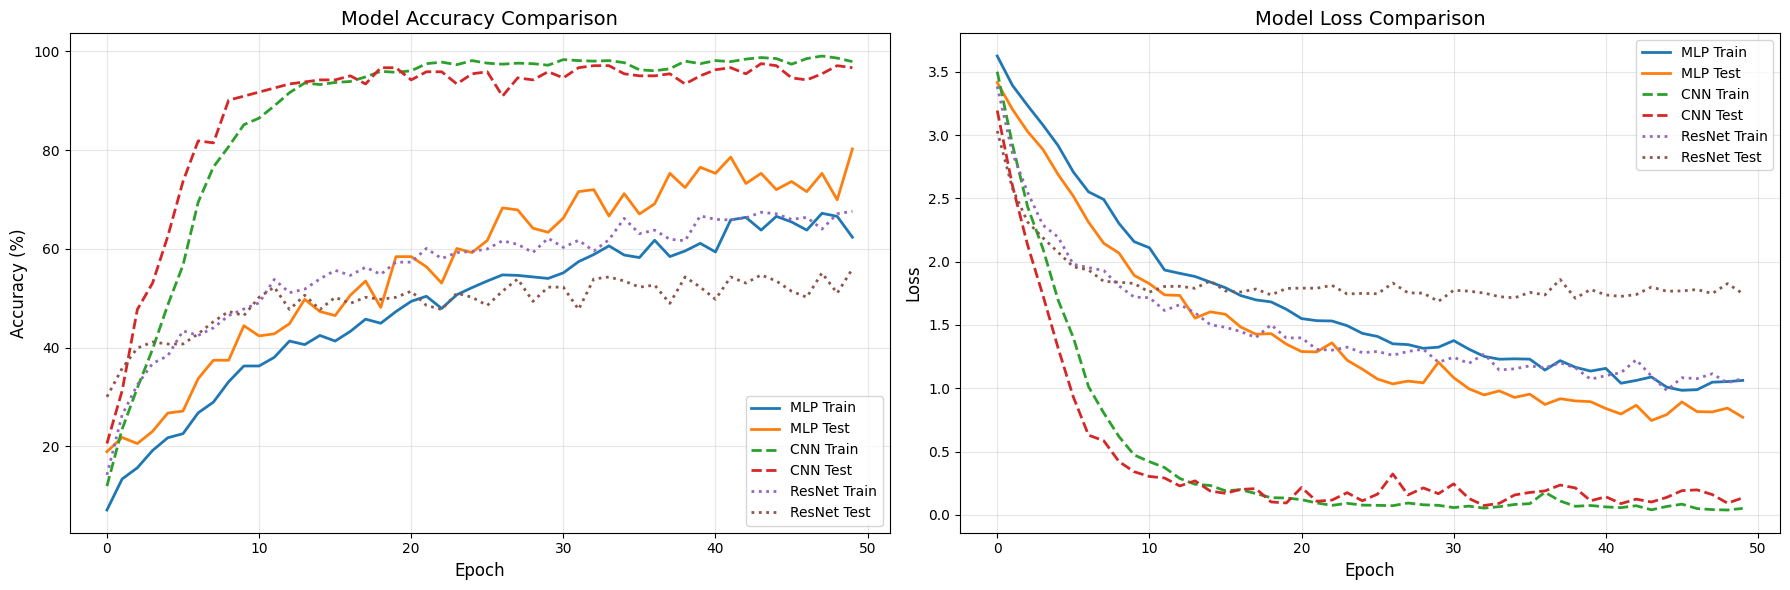

In [ ]:
# Plot training history for all three models
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot accuracy
axes[0].plot(mlp_train_accs, label='MLP Train', linewidth=2)
axes[0].plot(mlp_test_accs, label='MLP Test', linewidth=2)
axes[0].plot(cnn_train_accs, label='CNN Train', linewidth=2, linestyle='--')
axes[0].plot(cnn_test_accs, label='CNN Test', linewidth=2, linestyle='--')
axes[0].plot(resnet_train_accs, label='ResNet Train', linewidth=2, linestyle=':')
axes[0].plot(resnet_test_accs, label='ResNet Test', linewidth=2, linestyle=':')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].set_title('Model Accuracy Comparison', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(mlp_train_losses, label='MLP Train', linewidth=2)
axes[1].plot(mlp_test_losses, label='MLP Test', linewidth=2)
axes[1].plot(cnn_train_losses, label='CNN Train', linewidth=2, linestyle='--')
axes[1].plot(cnn_test_losses, label='CNN Test', linewidth=2, linestyle='--')
axes[1].plot(resnet_train_losses, label='ResNet Train', linewidth=2, linestyle=':')
axes[1].plot(resnet_test_losses, label='ResNet Test', linewidth=2, linestyle=':')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Model Loss Comparison', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Get final predictions for ResNet
_, _, resnet_preds, resnet_labels = evaluate_model(resnet_model, test_loader_cnn,
                                                    criterion_resnet, device)

# Print comprehensive comparison
print("\n" + "="*70)
print("FINAL MODEL COMPARISON")
print("="*70)

print(f"\n{'Model':<15} {'Test Accuracy':<15} {'Parameters':<15}")
print("-"*70)

mlp_params = sum(p.numel() for p in mlp_model.parameters())
cnn_params = sum(p.numel() for p in cnn_model.parameters())
resnet_params = sum(p.numel() for p in resnet_model.parameters() if p.requires_grad)

print(f"{'MLP':<15} {mlp_test_accs[-1]:>12.2f}%   {mlp_params:>12,}")
print(f"{'CNN':<15} {cnn_test_accs[-1]:>12.2f}%   {cnn_params:>12,}")
print(f"{'ResNet':<15} {resnet_test_accs[-1]:>12.2f}%   {resnet_params:>12,}")

print("\n" + "="*70)
print("IMPROVEMENT ANALYSIS")
print("="*70)
print(f"CNN vs MLP:     {cnn_test_accs[-1] - mlp_test_accs[-1]:>+6.2f}%")
print(f"ResNet vs MLP:  {resnet_test_accs[-1] - mlp_test_accs[-1]:>+6.2f}%")
print(f"ResNet vs CNN:  {resnet_test_accs[-1] - cnn_test_accs[-1]:>+6.2f}%")


FINAL MODEL COMPARISON

Model           Test Accuracy   Parameters     
----------------------------------------------------------------------
MLP                    80.25%        830,635
CNN                    96.71%        656,683
ResNet                 55.97%        142,379

IMPROVEMENT ANALYSIS
CNN vs MLP:     +16.46%
ResNet vs MLP:  -24.28%
ResNet vs CNN:  -40.74%


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Calculate metrics for all models
models_results = {
    'MLP': (mlp_labels, mlp_preds),
    'CNN': (cnn_labels, cnn_preds),
    'ResNet': (resnet_labels, resnet_preds)
}

print("\n" + "="*70)
print("DETAILED METRICS")
print("="*70)

for model_name, (true_labels, predictions) in models_results.items():
    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(
        true_labels, predictions, average='weighted'
    )

    print(f"\n{model_name}:")
    print(f"  Accuracy:  {accuracy*100:.2f}%")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")


DETAILED METRICS

MLP:
  Accuracy:  80.25%
  Precision: 0.7425
  Recall:    0.8025
  F1-Score:  0.7631

CNN:
  Accuracy:  96.71%
  Precision: 0.9645
  Recall:    0.9671
  F1-Score:  0.9623

ResNet:
  Accuracy:  55.97%
  Precision: 0.5507
  Recall:    0.5597
  F1-Score:  0.5445


c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Calculate metrics for all models
models_results = {
    'MLP': (mlp_labels, mlp_preds),
    'CNN': (cnn_labels, cnn_preds),
    'ResNet': (resnet_labels, resnet_preds)
}

print("\n" + "="*70)
print("DETAILED METRICS")
print("="*70)

for model_name, (true_labels, predictions) in models_results.items():
    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(
        true_labels, predictions, average='weighted'
    )

    print(f"\n{model_name}:")
    print(f"  Accuracy:  {accuracy*100:.2f}%")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")


DETAILED METRICS

MLP:
  Accuracy:  80.25%
  Precision: 0.7425
  Recall:    0.8025
  F1-Score:  0.7631

CNN:
  Accuracy:  96.71%
  Precision: 0.9645
  Recall:    0.9671
  F1-Score:  0.9623

ResNet:
  Accuracy:  55.97%
  Precision: 0.5507
  Recall:    0.5597
  F1-Score:  0.5445


c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

In [ ]:
print("\n" + "="*70)
print("CLASSIFICATION REPORTS")
print("="*70)

print("\nMLP Classification Report:")
print("-"*70)
print(classification_report(mlp_labels, mlp_preds))

print("\nCNN Classification Report:")
print("-"*70)
print(classification_report(cnn_labels, cnn_preds))

print("\nResNet Classification Report:")
print("-"*70)
print(classification_report(resnet_labels, resnet_preds))


CLASSIFICATION REPORTS

MLP Classification Report:
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.93      0.81      0.87        16
           2       0.78      0.88      0.82        16
           3       0.00      0.00      0.00         6
           4       0.86      0.86      0.86        14
           5       0.50      0.91      0.65        11
           6       1.00      1.00      1.00         4
           7       0.83      0.62      0.71         8
           8       0.82      0.82      0.82        11
           9       0.73      1.00      0.84         8
          10       0.94      1.00      0.97        16
          11       0.67      1.00      0.80         8
          12       0.94      0.94      0.94        17
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00         6
          15

c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\denny\.conda\envs\MyDjangoEnv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

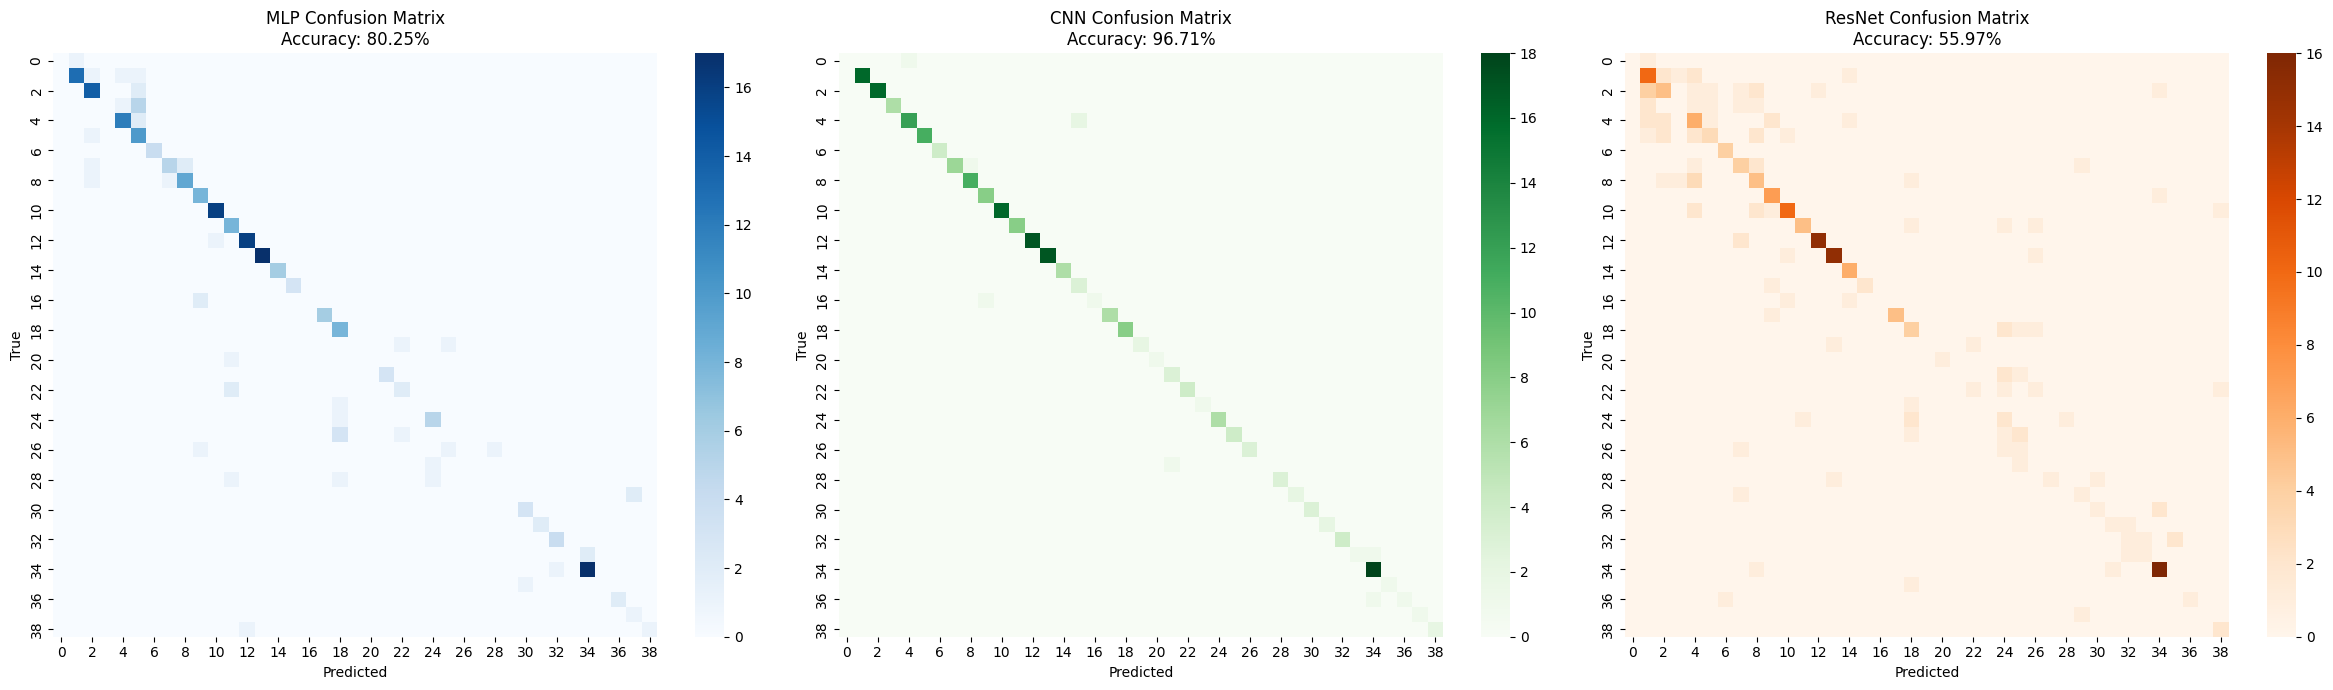

In [ ]:
import seaborn as sns
# Plot confusion matrices for all three models
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# MLP Confusion Matrix
cm_mlp = confusion_matrix(mlp_labels, mlp_preds)
sns.heatmap(cm_mlp, annot=False, fmt='d', cmap='Blues', ax=axes[0], cbar=True)
axes[0].set_title(f'MLP Confusion Matrix\nAccuracy: {mlp_test_accs[-1]:.2f}%', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=10)
axes[0].set_ylabel('True', fontsize=10)

# CNN Confusion Matrix
cm_cnn = confusion_matrix(cnn_labels, cnn_preds)
sns.heatmap(cm_cnn, annot=False, fmt='d', cmap='Greens', ax=axes[1], cbar=True)
axes[1].set_title(f'CNN Confusion Matrix\nAccuracy: {cnn_test_accs[-1]:.2f}%', fontsize=12)
axes[1].set_xlabel('Predicted', fontsize=10)
axes[1].set_ylabel('True', fontsize=10)

# ResNet Confusion Matrix
cm_resnet = confusion_matrix(resnet_labels, resnet_preds)
sns.heatmap(cm_resnet, annot=False, fmt='d', cmap='Oranges', ax=axes[2], cbar=True)
axes[2].set_title(f'ResNet Confusion Matrix\nAccuracy: {resnet_test_accs[-1]:.2f}%', fontsize=12)
axes[2].set_xlabel('Predicted', fontsize=10)
axes[2].set_ylabel('True', fontsize=10)

plt.tight_layout()
plt.show()

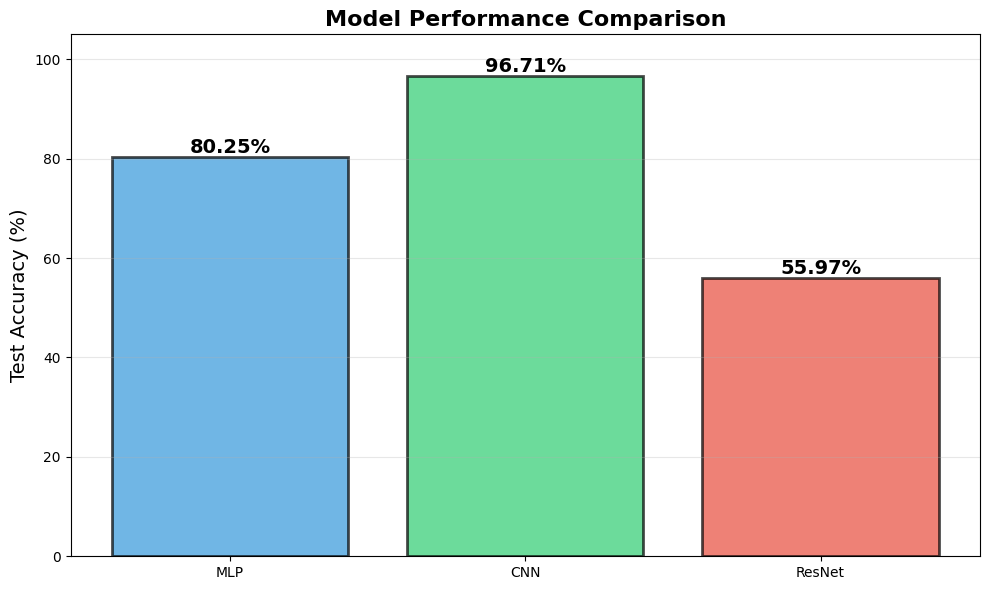

In [ ]:
# Create bar chart comparing accuracies
fig, ax = plt.subplots(figsize=(10, 6))

models = ['MLP', 'CNN', 'ResNet']
accuracies = [mlp_test_accs[-1], cnn_test_accs[-1], resnet_test_accs[-1]]
colors = ['#3498db', '#2ecc71', '#e74c3c']

bars = ax.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.2f}%',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_ylabel('Test Accuracy (%)', fontsize=14)
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold')
ax.set_ylim([0, 105])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()